# **PyTorch Classification**

What is Classification? 

**Classification** in PyTorch refers to the process of creating a model that can categorize input data into predefined classes or categories. This is a fundamental aspect of machine learning, and PyTorch, as a popular deep learning library, provides all the necessary tools to construct, train, and evaluate such models.

The following steps illustrate a simple, yet typical procedure for creating a binary classification model in PyTorch.

 1. **Define the Model Architecture:** This typically involves defining a Python class that inherits from PyTorch's `nn.Module` and then defining the layers of the neural network within this class.
 2. **Define a Loss Function:** Since it's a binary classification problem, a common choice is the binary cross-entropy loss. PyTorch provides it through `torch.nn.BCELoss`.
 3. **Choose an Optimizer:** PyTorch provides several optimization algorithms like **Stochastic Gradient Descent (SGD)**, Adam, RMSprop, etc. Adam is a commonly used optimizer due to its effectiveness.
 4. **Train the Model:** This involves passing your input data through the model (forward pass), calculating the loss, and then adjusting the model's weights based on the gradients (backward pass and optimization step).
 5. **Evaluate the Model:** After training the model, you need to evaluate it on unseen data (test data). Depending on the application, you might use accuracy, precision, recall, F1-score, AUC-ROC, etc., as evaluation metrics.

Ultimately, we will use the following concepts along with computer vision in order to train a model to identify and classify sick strawberries and healthy ones. For now, we will focus on the underlying theory and code.

**Reference:**<br>
**02_pytorch_classification:** https://www.learnpytorch.io/02_pytorch_classification/

## **Introduction**

Before coding, we will start with some of the basic underlying concepts of a classification problem. 

### **What does this section cover?**

**Section Topics:**

|Problem type|What is it?|
|:---------------|:---------------|
|**0. Architecture of a classification neural network**|Neural networks can come in almost any shape or size, but they typically follow a similar floor plan.|
|**1. Getting binary classification data ready**|Data can be almost anything but to get started we're going to create a simple binary classification dataset.|
|**2. Building a PyTorch classification model**|Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a<br> training loop specific to classification.|
|**3. Fitting the model to data** (training)|We've got data and a model, now let's let the model (try to) find patterns in the (training) data.|
|**4. Making predictions and evaluating a model** (inference)|Our model's found patterns in the data, let's compare its findings to the actual (testing) data.|
|**5. Improving a model** (from a model perspective)|We've trained an evaluated a model but it's not working, let's try a few things to improve it.|
|**6. Non-linearity**|So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines?|
|**7. Replicating non-linear functions**|We used non-linear functions to help model non-linear data, but what do these look like?|
|**8. Putting it all together with multi-class classification**|Let's put everything we've done so far for binary classification together with a multi-class classification problem.|

### **What is a classification problem?**

A classification problem involves predicting whether something is one thing or another.

**Classification problem types:**

|Problem type|What is it?|Example|
|:---------------|:---------------|:---------------|
|**Binary classification**|Target can be one of two options, e.g. yes or no|Predict whether or not someone has heart disease based on their health parameters.|
|**Multi-class classification**|Target can be one of more than two options|Decide whether a photo of is of food, a person or a dog.|
|**Multi-label classification**|Target can be assigned more than one option|Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy).|


### **Architecture of a classification neural network:**

Before we get into writing code, let's look at the general architecture of a classification neural network.

**General Architecture:**

|Hyperparameter|Binary Classification|Multiclass classification|
|:---------------|:---------------|:---------------|
|**Input layer shape**<br> (`in_features`)|Same as number of features (e.g. 5 for age, sex, height, weight,<br> smoking status in heart disease prediction)|Same as binary classification|
| **Hidden layer(s)**|Problem specific, minimum = 1, maximum = unlimited|Same as binary classification|
|**Neurons per hidden layer**|Problem specific, generally 10 to 512|Same as binary classification|
|**Output layer shape**<br> (`out_features`)|1 (one class or the other)|	1 per class (e.g. 3 for food, person<br> or dog photo)|
|**Hidden layer activation**|Usually ReLU (rectified linear unit) but can be many others|Same as binary classification|
|**Output activation**|	Sigmoid (`torch.sigmoid` in PyTorch)|Softmax (`torch.softmax` in PyTorch)|
|**Loss function**|Binary crossentropy (`torch.nn.BCELoss` in PyTorch)|Cross entropy (`torch.nn.CrossEntropyLoss`<br> in PyTorch)|
|**Optimizer**|SGD (stochastic gradient descent), Adam (see `torch.optim` <br> for more options)|Same as binary classification|




## **1. Preparing Classification:**

**Classification** in PyTorch refers to the process of creating a model that can categorize input data into predefined classes or categories. 

**Resources:** <br>
**`sklearn`**: https://scikit-learn.org/stable/<br>
**`sklearn.datasets`**: https://scikit-learn.org/stable/datasets/toy_dataset.html<br>
**`make_circles`**: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html<br>
**`pandas`**: https://pandas.pydata.org/docs/<br>
**`pd.DataFrame()`**: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html<br>
**`matplotlib.pyplot`**: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html<br>
**`plt.scatter()`**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html



In [ ]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [ ]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

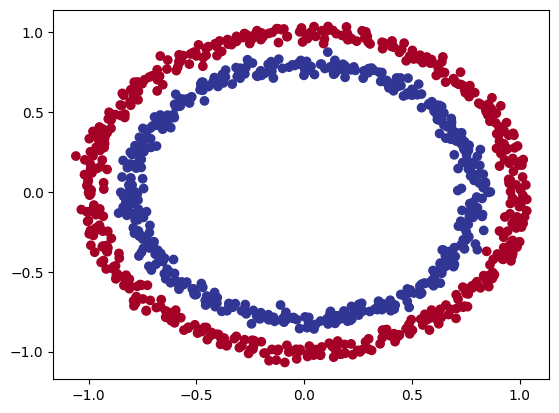

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

Note: The data we're working with is often referred to as a **toy** dataset, a dataset that is small enough to experiment with but still sizeable enough to practice the fundamentals.

### **1.1 Input and Output Shapes**

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### **1.2 Turn Data into Tensors**

Also, create train and test splits

**Resources:**<br>
**`from sklearn.model_selection import train_test_split`**: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

test_size = 0.2 corresponds to 20% test and 80% train

## **2. Building a Model**

To classify the blue and red dots (binary).

**Steps:**
1. Setup device agnostic code to run on GPU if there is one. 
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop (next section)

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

We've setup device agnotic code, let's create a model that:

1. Subclasses `nn.Module` 
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass.
4. Instantiate an instance of our model and send it to target `device`

In [ ]:
# # 1. Construct a model class that subclasses nn.Module
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
#         self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
#         self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
#     # 3. Define a forward method containing the forward pass computation
#     def forward(self, x):
#         # Return the output of layer_2, a single feature, the same shape as y
#         return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# # 4. Create an instance of the model and send it to target device
# model_0 = CircleModelV0().to(device)
# model_0

**Code Explaination:**

|Line #|Code|What does it do?|
|:---------------|:---------------|:---------------|
|2|**`class CircleModelV0(nn.Module):`**|This line of code is defining a new class `CircleModelV0`, which is a **subclass** of PyTorch's **`nn.Module`** class.|
|3|**`def __init__(self):`**|This line is the *beginning* of the **initializer method** for the `CircleModelV0` class. When a new instance of the<br> class is created, the `__init__` method is  called to initialize the object's attributes.|
|4|**`super().__init__()`**|This line is *calling* the **initializer method** of the `CircleModelV0` class's superclass (`nn.Module`). This is<br> necessary to ensure that all of the functionality from `nn.Module` is properly inherited.|
|6|**`self.layer_1 = nn.Linear(in_features=2, out_features=5)`**|This line is creating a **linear layer** that will take in 2 features and output 5. The parameters of this layer<br> (the weights and biases) are  initialized and will be learned during training.|
|7|**`self.layer_2 = nn.Linear(in_features=5, out_features=1)`**|This line is creating another **linear layer** that will take in the 5 outputs from layer_1 and output a single value.<br> This is the final layer of the network, and its output is the network's prediction.|
|10|**`def forward(self, x):`**|This is defining the **forward method**, which specifies the **forward pass** of the network — that is, how the network<br> transforms its input into its output.|
|12|**`return self.layer_2(self.layer_1(x))`**|This line is the core of the **forward pass**. It takes the input x, passes it through layer_1, and then passes the<br> result through layer_2|
|15|**`model_0 = CircleModelV0().to(device)`**|This line is creating an instance of **`CircleModelV0`** and moving it to a specified device (in this case GPU).<br> The **`.to(device)`** function call is necessary for GPU acceleration.|
|16|**`model_0`**|This line will print a summary of **`model_0`** to the console.|


### **2.1:  `nn.Sequential`**

A simpler method of making the same model

**Resources:** <br>
**`nn.Sequential()`**: https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html<br>
**`nn.Linear()`**: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html<br>

Note: While this method is simpler and does most of the work behind the scenes, it is still important to understand the original model because with a more complicated model some of the methods may be necessary. 

In [ ]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

**Code Explaination:**

|Line #|Code|What does it do?|
|:---------------|:---------------|:---------------|
|2|**`model_0 = nn.Sequential(`**|This line is defining `model_0 as` a sequential model, using the `nn.Sequential`<br> class provided by PyTorch. `nn.Sequential` is a container class which allows you<br> to stack different layers and operations in a sequence. |
|3|**`nn.Linear(in_features=2, out_features=5),`**|This line adds a linear layer as the first layer in the sequence. The layer will take<br> in 2 features as input and output 5 features. The parameters of the layer (weights<br> and biases) are automatically initialized and are learned during training|
|4|**`nn.Linear(in_features=5, out_features=1)`**|This line adds a second linear layer as the second layer in the sequence. This<br> layer will take the 5 outputs from the previous layer as input, and output a single<br> value. This is the final layer of the network, and its output is the network's<br> prediction.|
|5|).to(device)|This line moves the model and all its parameters to a specified device. This<br> step is necessary if you want to use GPU acceleration for your training.|
|6|model_0|This line will output a summary of the model_0 to the console. |

In [ ]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2341],
        [-0.1617],
        [ 0.0228],
        [-0.3088],
        [ 0.7318],
        [ 0.7705],
        [ 0.4124],
        [ 0.6325],
        [-0.0075],
        [-0.1490]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### **2.2  Loss Function and Optimizer**

Which loss function or optimizer should be used for classifcication model? 

For regression, we might select MAE or MSE (mean absolute or mean squared erro)

For classification, we migh select binary cross entropy or categorical cross entropy (cross entropy).

And for optimizers, two of the most common and useful are SGD and Adam, however, PyTorch has many built in option. 

References:<br> 
**Binary Cross Entropy:** https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

**`nn.BCEWithLogitsLoss:`** https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc
  

## **3. Train Model**

Steps to train a model (Reminder):
1. **Forward pass** - The model goes through all of the training data once, performing its forward() function calculations (`model(x_train)`).
2. **Calculate the loss** - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (`loss = loss_fn(y_pred, y_train)`).
3. **Zero gradients** - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (`optimizer.zero_grad()`).
4. **Loss Backward** (backpropagation) - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (`loss.backward()`).
5. **Step the optimizer** (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (`optimizer.step()`). 

### **3.1 From Raw Logits -> Prediction Probabilities -> Prediction Labels**

**General Steps for Binary Classificationd:**

1. **Raw Logit**: The output from a binary classification model will be a single value (the logit) for each instance in a dataset. If the logit is positive, it suggests that the instance belongs to the positive class, whereas if it's negative, it suggests that the instance belongs to the negative class. However, these logits are not easily interpretable as probabilities.

2. **Prediction Probability**: To convert the logit to a prediction probability, the logistic (sigmoid) function is used. The logistic function transforms the logit into a value between 0 and 1, which can be interpreted as the probability that the instance belongs to the positive class.

3. **Prediction Label**: Once you have the prediction probability, you choose a threshold to determine the prediction label. If the probability is greater than the threshold, the prediction label is the positive class; otherwise, it's the negative class.







In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2341],
        [-0.1617],
        [ 0.0228],
        [-0.3088],
        [ 0.7318]], device='cuda:0', grad_fn=<SliceBackward0>)

In [ ]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4417],
        [0.4597],
        [0.5057],
        [0.4234],
        [0.6752]], device='cuda:0', grad_fn=<SigmoidBackward0>)

For prediction probibility values, perform a range-style rounding on them
* `y_pred_probs` >= 0.5, y=1 (class 1)
* `y_pred_probs` < 0.5, y=0 (class 0)

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

**Code Explaination:**

|Code|What does it do?|
|:---------------|:---------------|
|**`model_0.eval()`**|This sets the model_0 to evaluation mode. In PyTorch, when a model is set to evaluation mode with `.eval()`,<br> it disables certain behaviors such as dropout and batch normalization.|
|**`with torch.inference_mode()`**|This context manager is used to reduce memory usage and increase inference speed during model evaluation.<br> Operations inside this context will not track gradients.|
|**`y_logits = model_0(X_test.to(device))[:5]`**| This line performs the forward pass of the model_0 with the test data `X_test` transferred to the appropriate<br> device (GPU). It saves the first 5 model output logits to y_logits.|
|**`y_logits`**|This line is used to display the value of `y_logits`|
|**`y_pred_probs = torch.sigmoid(y_logits)`**|This line applies the sigmoid function to the logits (`y_logits`) to convert them into probabilities. The resulting<br> probabilities are saved to `y_pred_probs`.|
|**`y_pred_probs`**|This line is used to display the value of `y_pred_probs`|
|**`y_preds = torch.round(y_pred_probs)`**| This line rounds the predicted probabilities (`y_pred_probs`) to the nearest integer (0 or 1) to generate the<br> predicted class labels, and these predictions are saved to `y_preds`.|
|**`y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))`**|This line repeats the forward pass, sigmoid activation, and rounding all in one line to produce class labels.<br> It's essentially repeating lines 3, 5, and 7 for the first 5 test data instances.|
|**`print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))`**|This line checks the equality between `y_preds` and `y_pred_labels`. The `squeeze()` function is used to remove<br> any dimensions of size one from the tensors. `torch.eq` compares the two tensors element-wise and prints the<br> result.|
|**`y_preds.squeeze()`**|This line is used to remove any dimensions of size one from the `y_preds` tensor and then display the squeezed<br> tensor.|

### **3.2 Building Training and Test Loops**


In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.72180, Accuracy: 50.75% | Test loss: 0.71152, Test acc: 54.00%
Epoch: 10 | Loss: 0.70752, Accuracy: 50.62% | Test loss: 0.70145, Test acc: 51.50%
Epoch: 20 | Loss: 0.70098, Accuracy: 50.25% | Test loss: 0.69719, Test acc: 51.50%
Epoch: 30 | Loss: 0.69767, Accuracy: 50.88% | Test loss: 0.69527, Test acc: 48.00%
Epoch: 40 | Loss: 0.69584, Accuracy: 50.50% | Test loss: 0.69436, Test acc: 46.50%
Epoch: 50 | Loss: 0.69477, Accuracy: 50.50% | Test loss: 0.69395, Test acc: 45.00%
Epoch: 60 | Loss: 0.69412, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 45.50%
Epoch: 70 | Loss: 0.69371, Accuracy: 50.12% | Test loss: 0.69376, Test acc: 48.50%
Epoch: 80 | Loss: 0.69345, Accuracy: 49.62% | Test loss: 0.69379, Test acc: 49.50%
Epoch: 90 | Loss: 0.69328, Accuracy: 49.38% | Test loss: 0.69385, Test acc: 49.50%


## **4. Make Predictions and Evaluate**

From the metrics it looks like the model isn't learning anything...

To inspect, make predictions and make them visual

Visualize, visualize, visualize

To do so, import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

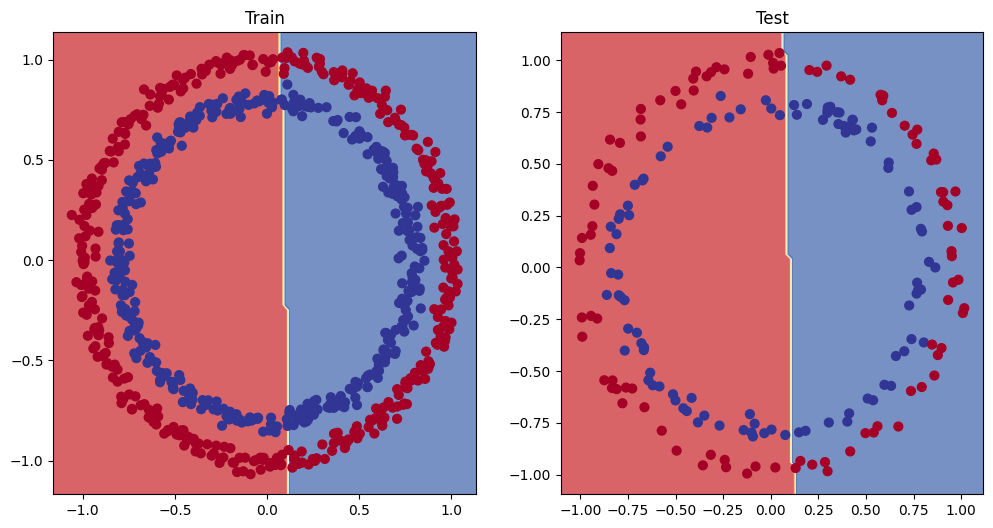

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## **5. Improving a Model**

| Model Improvement Technique | Benefits |
|:---|:---|
|**Add more layers**|***More Complex Representations:*** Neural networks learn hierarchical representations of the data.  By adding more layers, you give the network the capacity<br> to learn more complex representations.<br> ***Model Capacity:*** More layers increase the capacity of a model, which is the ability to learn a wider range of functions or relationships. With more parameters,<br> the model can potentially fit more complex data patterns, which can lead to improved performance on the training data.<br> ***Feature Extraction:*** Deeper networks can automatically learn useful features from the input data, reducing the need for manual feature engineering. This can be<br> particularly valuable for complex tasks like image or speech recognition, where manual feature engineering can be difficult.   |
|**Add more hidden units**|Similar to adding more layers, more hidden units per layer means a potential increase in learning capabilities of the model, i.e. more complex representations <br>and more capacity, more hidden units is often referred to as making your neural network wider.|
|**Fit for longer**|***Learning Opportunity:*** Each epoch is a complete pass over the entire training dataset. By training for more epochs, the model gets more opportunities to adjust its <br>weights based on the errors it made on the predictions.<br>***Better Approximation:*** More epochs could help the model to converge to a better approximation of the underlying function that maps the input features to the<br> target.|
|**Changing the activation function**|***Non-Linearity:*** Different activation functions introduce different types of non-linearities. Depending on the nature of the problem and the data, one type of<br> non-linearity might be more suitable than another.<br> ***Gradient Propagation:*** Some activation functions, like ReLU (Rectified Linear Unit), were designed to help alleviate the vanishing gradient problem, which can hinder<br> learning in deep neural networks. Using these can lead to faster and more stable convergence during training.<br> ***Output Range:*** The range of the activation function impacts the range of the output from the neuron. This can be important, for instance, if the targets are all positive,<br> an activation function that only outputs positive values (like ReLU) might be more suitable.<br>***Computational Efficiency:*** Some activation functions are more computationally efficient to calculate than others. This can influence training time and the overall<br> efficiency of the model.|
|**Change the learning rate**|***Learning Speed:*** A higher learning rate means the model learns faster, i.e., the weights in the model are updated more aggressively in each iteration. This can speed<br> up the convergence and reduce the training time.<br> ***Convergence:*** If the learning rate is too high, the model might overshoot the optimal point and fail to converge, leading to unstable training and poor results. If the<br> learning rate is too low, the model might converge too slowly or get stuck in a suboptimal point.<br> ***Generalization:*** The learning rate can also affect the model's generalization ability. A good learning rate can help the model find a balance between underfitting<br> and overfitting the data.|
|**Change the loss function**|***Alignment with Task:*** The choice of loss function should align with the specific task at hand. By choosing a loss function that better aligns with your specific task,<br> you can potentially improve your model's performance.<br> ***Robustness to Outliers:*** If your data contains a lot of outliers and you're currently using a loss function that's sensitive to them, changing to a more robust loss<br> function might improve your model's performance.<br> ***Class Imbalance:*** If you're working on a classification problem with imbalanced classes, changing to a loss function that accounts for the imbalance, like Weighted<br> Cross Entropy or Focal loss, might improve your model's performance.<br> ***Differentiability:*** Some machine learning models require the loss function to be differentiable, because they use gradient-based optimization methods. If you're<br> currently using a non-differentiable loss function, changing to a differentiable one might enable these optimization methods and improve your model's performance.<br> ***Model Calibration:*** Certain loss functions like Log Loss or Cross Entropy can improve the calibration of probabilistic models by heavily penalizing confident wrong<br> predictions.|
|**Use transfer learning**|***Better Starting Point:*** Transfer learning provides a better starting point for the model's weights. The pre-trained model has already learned to recognize some of the<br> basic and complex patterns from the data it was trained on, and these patterns can often be useful for other tasks as well.<br> ***Data Efficiency:*** Transfer learning can be particularly beneficial when you have a limited amount of data for your target task. The pre-trained model acts as a good<br> feature extractor, and you only need to train the final layers of the model to adapt it to your task. This is much more data-efficient than training a model from scratch.<br> ***Generalization:*** Pre-trained models are often trained on large, diverse datasets, so they have learned a wide range of features. This diversity often translates to better<br> generalization performance on the target task.<br> ***Speed:*** Starting with a pre-trained model can significantly reduce the time required to train a model, as you're starting from a solution that has already proven<br> effective at a similar task. This is especially important when working with large, complex models like deep neural networks.<br> ***Performance:*** Numerous studies have shown that transfer learning can lead to improved model performance on a wide range of tasks, particularly in domains<br> like computer vision and natural language processing where large pre-trained models are readily available.|

First try:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [ ]:
from matplotlib.widgets import Circle
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self,x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Creat an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Calculate Loss/Acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred=y_pred)
  
  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss Backward
  loss.backward()

  # Optimizer Step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    # Forward Pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # Calculate Loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  
  # Print out
  if epoch % 100 == 0: 
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
    


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


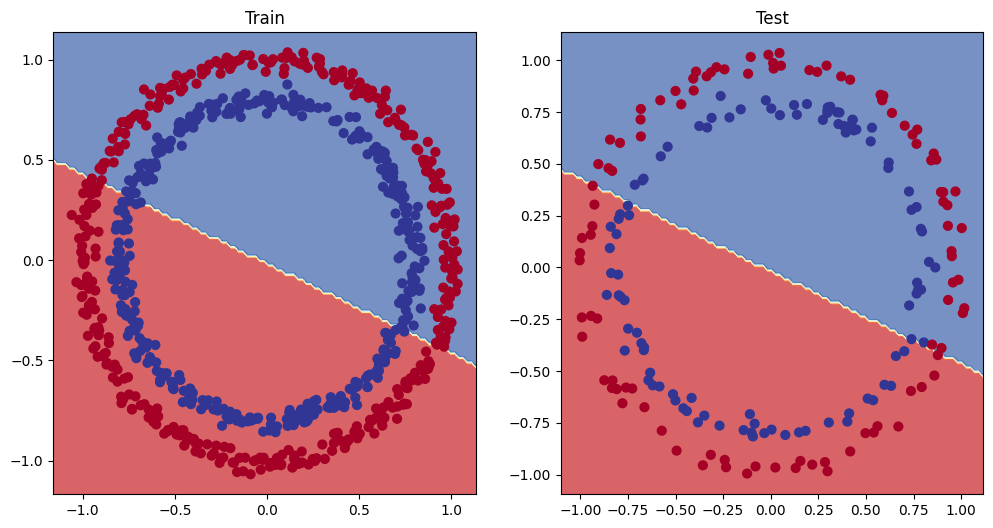

In [ ]:
# Plot the decision boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 **Testing to see if our model can model a straight line**

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


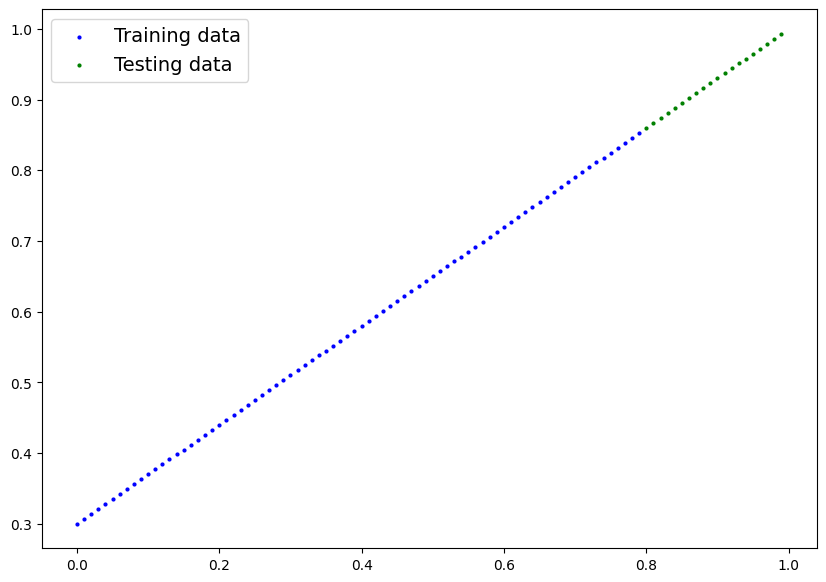

In [ ]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### 5.2 **Adjust model_1 to fit straght line**

Mostly review

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      test_pred = model_2(X_test_regression) 
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out 
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


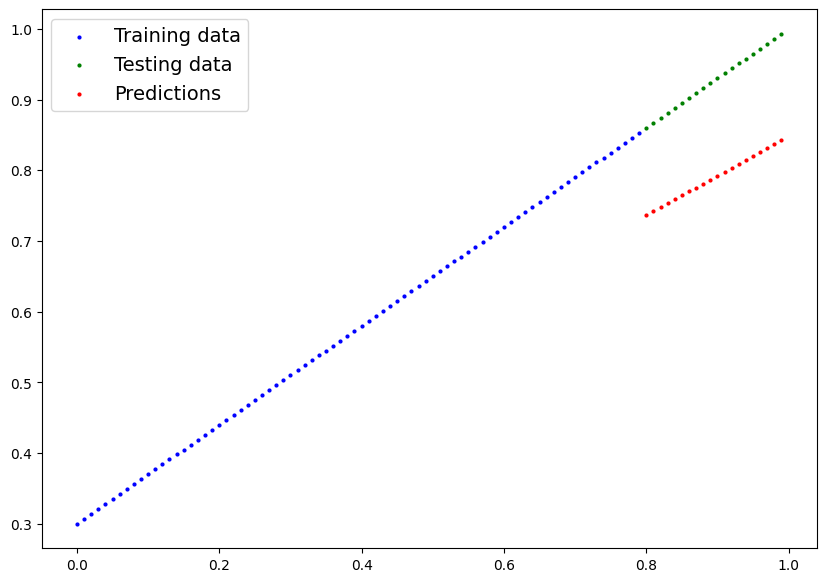

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## **6. Non-Linearity**

The missing piece

"What patterns could you draw if you were given an infinite amout of straight and non-straight lines?"

Or in machine learning terms, an infinite(but really it is finite) of linear and non-linear functions? 


### 6.1 **Recreate the non-linear Data**

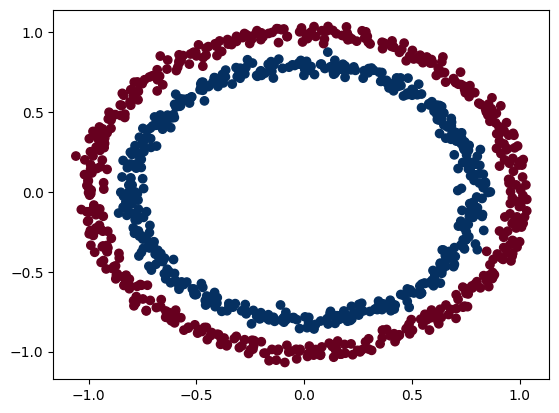

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
# Convert data to tensors, then train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Train and test splits
X_train, X_text, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### **6.2 Building non-linear Model**

**References:**<br> 
**`torch.nn` nonlinear:** https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity<br>
**`nn.ReLU:`** https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [ ]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non-linear activation function

  def forward(self,x):
    # Where should we put our non-linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

Other binary classification problems:

email = spam or not spam
credit cards = fraud or not fraud
insurance claims = at fault or not at fault

In our case:

Strawberry = healthy or not healthy


### **6.3 Training non-linear Model**

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 10000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training
for epoch in range(epochs):
    model_3.train()
    # 1. Forward Pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer sero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ###
    model_3.eval()
    with torch.inference_mode():
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out 
    if epoch % 1000 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test loss: {test_loss:.4f}, Test Acc: {test_acc:2f}")

Epoch: 0 | Loss: 0.6929, Acc: 50.00 | Test loss: 0.6932, Test Acc: 50.000000
Epoch: 1000 | Loss: 0.5682, Acc: 87.75 | Test loss: 0.5738, Test Acc: 86.500000
Epoch: 2000 | Loss: 0.0418, Acc: 99.88 | Test loss: 0.0658, Test Acc: 100.000000
Epoch: 3000 | Loss: 0.0167, Acc: 99.88 | Test loss: 0.0336, Test Acc: 100.000000
Epoch: 4000 | Loss: 0.0105, Acc: 100.00 | Test loss: 0.0245, Test Acc: 99.500000
Epoch: 5000 | Loss: 0.0077, Acc: 100.00 | Test loss: 0.0199, Test Acc: 99.500000
Epoch: 6000 | Loss: 0.0060, Acc: 100.00 | Test loss: 0.0173, Test Acc: 99.500000
Epoch: 7000 | Loss: 0.0050, Acc: 100.00 | Test loss: 0.0156, Test Acc: 99.500000
Epoch: 8000 | Loss: 0.0043, Acc: 100.00 | Test loss: 0.0145, Test Acc: 99.500000
Epoch: 9000 | Loss: 0.0037, Acc: 100.00 | Test loss: 0.0137, Test Acc: 99.500000


### 6.4 **Evaluatig model trained with non_linear activation functions**

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

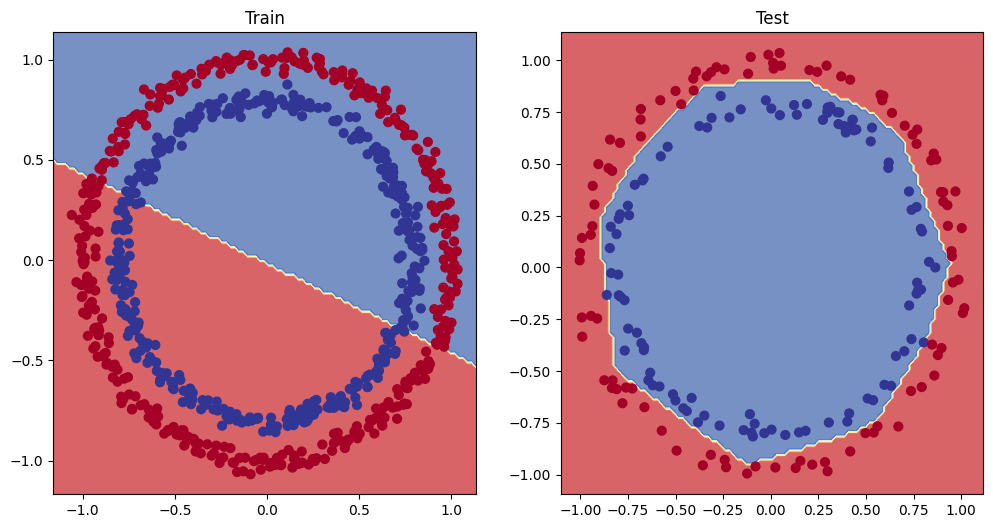

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # linear model
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # non-linear model

In [ ]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.9036,  1.5960],
                      [-0.7052,  2.7153],
                      [-0.1549,  0.1427],
                      [-3.0099, -0.3671],
                      [ 0.8623, -2.9784],
                      [ 1.7082, -0.0545],
                      [ 2.3630,  0.5450],
                      [ 0.3410, -0.0998],
                      [ 0.5872,  0.8908],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.2418, -1.2439, -0.2872, -0.6927, -0.7581, -0.8380, -0.9570, -0.4252,
                      -0.1943, -0.6984])),
             ('layer_2.weight',
              tensor([[-0.0179, -0.9311,  0.2441, -0.4759, -0.5108, -0.1861, -0.4244,  0.2555,
                       -0.0917, -0.0997],
                      [ 1.6224,  2.6898,  0.1331,  2.8226,  2.7405,  1.5594,  2.2915,  0.0566,
                        0.9245, -0.1927],
                      [-0.3130, -0.1244, -0.2426,  0.1545,  0.0910,  0.1

## **7. Replicating non-linear Activation Functions**

Rather than telling it what to learn, we give it tools to discover patterns in data and it tries to figure out patterns on its own

And these tools are linear and non-linear functions

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

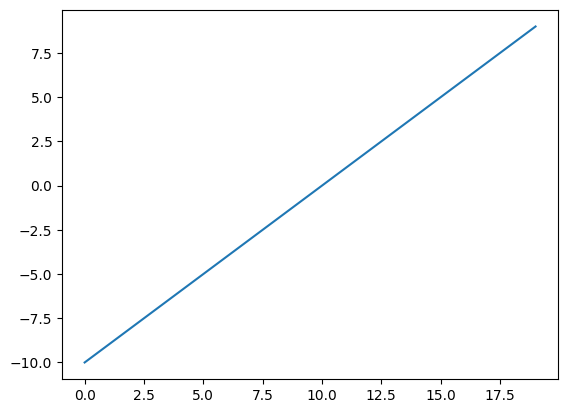

In [ ]:
# Visualize the tensor
plt.plot(A)

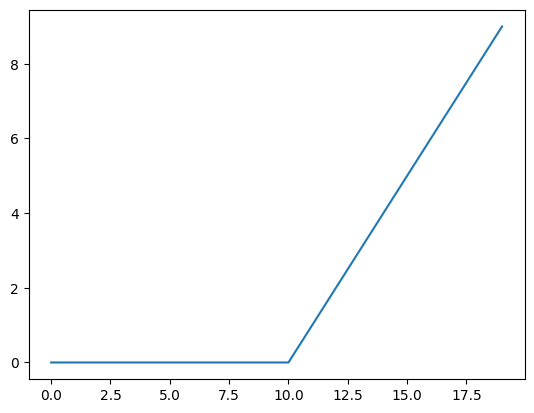

In [ ]:
# plot torch ReLU activation function
plt.plot(torch.relu(A))

In [ ]:
# Replicate (write our own) ReLU function
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors
  
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

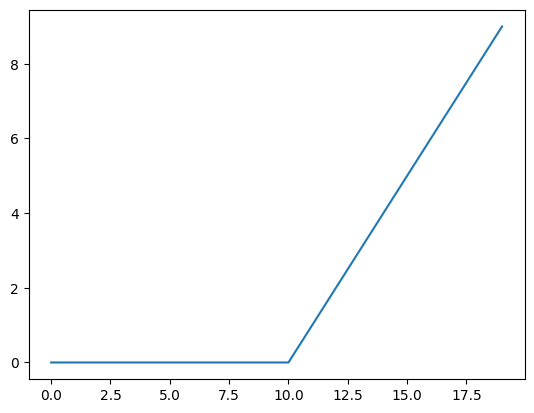

In [ ]:
# Plot our ReLU activation function
plt.plot(relu(A));

We, successfully wrote our own ReLU function, now let's try sigmoid. 

In [ ]:
# Replicate sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

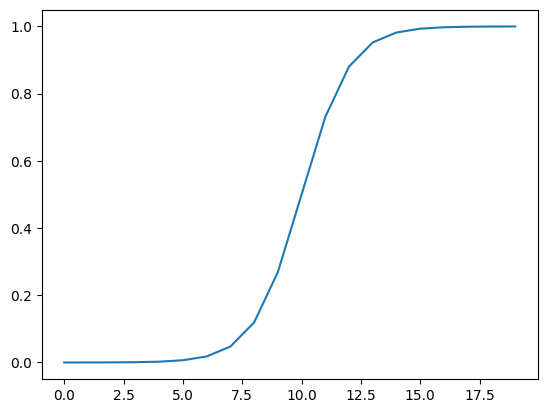

In [ ]:
# plot the torch sigmoid function
plt.plot(torch.sigmoid(A));

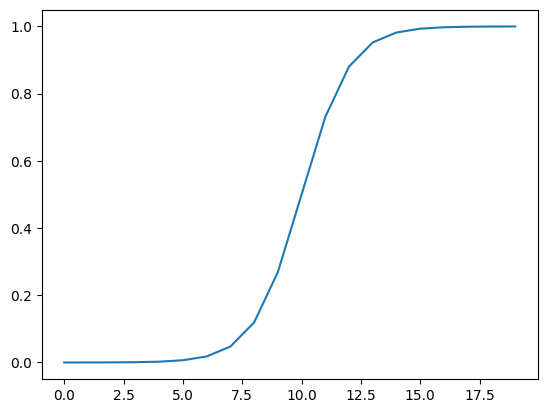

In [ ]:
# our sigmoid function
plt.plot(sigmoid(A));

Sigmoid Success!!

Here we conclude the learning portion of section 02. However, for the final subsection we will create put everything we have learned in 02 together into one final model. For an added layer of difficulty we will create a multi-class classification model. See ***02 PyTorch_Classification_Final*** notebook.